<span style="color:#87CEEB; font-size:30px; font-weight:bold;">Desafío - Estadística Descriptiva y Probabilidades (Parte I)
</span><br>
<span style="font-size:15px;">Marcela Alejandra Barrera Puentes</span>

<span style="font-size:15px;">En este desafío validaremos nuestros conocimientos de estadística descriptiva aprendidos en la sesión. Para lograrlo, necesitarás aplicar lo aprendido, analizando un set de datos asociados a los ingresos obtenidos por la población en base de a la información demográfica entregada en el archivo ds_salaries.csv.
Lee todo el documento antes de comenzar el desarrollo individual, para asegurarte de tener el máximo de puntaje y enfocar bien los esfuerzos.</span>

<span style="color:#87CEEB; font-size:20px; font-weight:bold;">Descripción</span><br>

<span style="font-size:15px;"><span style="font-size:15px;">El conjunto de datos contiene un informe salarial fabricado en el que puedes realizar análisis para tratar de estimar el salario basado en las condiciones dadas. Las columnas son las siguientes:</span>

<span style="font-size:15px;"><span style="font-size:15px;">
- work_year: El año en que se pagó el salario.
- experience_level: El nivel de experiencia en el trabajo durante el año, con los
siguientes valores posibles: EN (nivel de entrada / junior), MI (nivel medio /
intermedio), SE (nivel senior / experto), EX (nivel ejecutivo / director).
- employment_type: El tipo de empleo para el puesto: PT (tiempo parcial), FT (tiempo
completo), CT (contrato), FL (trabajo freelance).
- job_title: El puesto de trabajo desempeñado durante el año.
- salary: El monto total del salario bruto pagado.
- salary_currency: La moneda en la que se pagó el salario, utilizando un código de
moneda ISO 4217.
- salary_in_usd: El salario en USD (tipo de cambio dividido por la tasa promedio de
USD para el año correspondiente a través de fxdata.foorilla.com).
- employee_residence: El país de residencia principal del empleado durante el año
laboral, utilizando un código de país ISO 3166.
- remote_ratio: La cantidad total de trabajo realizado de forma remota, con los
siguientes valores posibles: 0 (sin trabajo remoto, menos del 20%), 50 (parcialmente
remoto), 100 (totalmente remoto, más del 80%).
- company_location: El país de la oficina principal del empleador o sucursal
contratante, utilizando un código de país ISO 3166.
- company_size: El número promedio de personas que trabajaron para la empresa durante el año: S (menos de 50 empleados, pequeña), M (50 a 250 empleados, mediana), L (más de 250 empleados, grande)
</span>

<span style="color:#87CEEB; font-size:20px; font-weight:bold;">Requerimientos</span><br>

<span style="font-size:15px;"><span style="font-size:15px;">Se busca realizar un análisis estadístico de estos salarios, considerando:</span>

<span style="color:#87CEEB; font-size:20px; font-weight:bold;">1.</span>
<span style="font-size:15px;">El promedio general de los salarios, desviación estándar, quintiles y rango. (hint: escoge la columna adecuada para comparar)</span>

In [66]:
# Se instala pandas
!pip install pandas
# Se importa pandas
import pandas as pd
# Se lee el archivo csv: ds_salaries.csv
df = pd.read_csv('/Users/marce/Projects_Marce/Desafio_Latam/ds_salaries.csv', delimiter = ',')
# Buena práctica: se da una mirada a las primeras filas del DataFrame y las columnas que lo conforman
df.head()
print(df.head())
"""
Se observan las 11 columnas con el detalle mencionado más arriba: [1] work_year, [2] experience_level, [3] employment_type, [4]job_tittle,
[5] salary, [6] salary_currency, [7] salary_in_usd, [8] employee_residence, [9] remote_ratio, [10] company_location y [11] company_size
"""
# Buena práctica: se observa el tipo de información
df.info()
"""
Se observa que 4 de las 11 columnas son del tipo de dato integer. En resumen existen 3.755 entradas desde el registro 0 al 3.754 y
11 columnas
"""
df

   work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES           100   
1   30000             USD          30000                 US           100   
2   25500             USD          25500                 US           100   
3  175000             USD         175000                 CA           100   
4  120000             USD         120000                 CA           100   

  company_location company_size  
0               ES            L  
1               US

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [67]:
"""
Se genera un resumen estadístico para las columnas numéricas con df.describe(), que en este caso son 4: work_year, salary, salary_in_usd y
remote_ratio
"""
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [68]:
# Se utiliza salary_in_usd para calcular lo solicitado en punto 1: promedio, desviación estándar, quintiles y rangos
promedio = df['salary_in_usd'].mean()
desviacion_std = df['salary_in_usd'].std()
quintiles = df['salary_in_usd'].quantile([0.2, 0.4, 0.6, 0.8, 1.0])
rango = df['salary_in_usd'].max() - df['salary_in_usd'].min()
# Se muestra resultados
print(f"El promedio general de los salarios en USD es: {promedio:.2f}")
print(f"La desviación estándar del salario en USD es: {desviacion_std:.2f}")
print(f"Los quintiles de los salarios en USD son:")
print(quintiles)
print(f"El rango de los salarios en USD son: {rango:.2f}")


El promedio general de los salarios en USD es: 137570.39
La desviación estándar del salario en USD es: 63055.63
Los quintiles de los salarios en USD son:
0.2     83972.8
0.4    120000.0
0.6    149850.0
0.8    185900.0
1.0    450000.0
Name: salary_in_usd, dtype: float64
El rango de los salarios en USD son: 444868.00


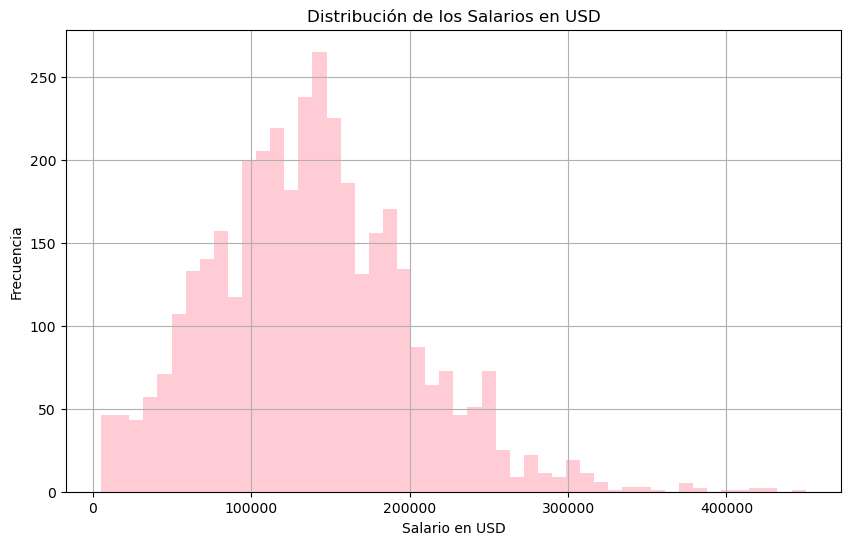

In [75]:
# Se explora gráficamente la información
import matplotlib.pyplot as plt
# Se grafica histograma de salarios
plt.figure (figsize=(10, 6))
plt.hist(df['salary_in_usd'], bins=50, color='#FFC0CB', alpha=0.8, label='Rosado pastel')
plt.title('Distribución de los Salarios en USD')
plt.xlabel('Salario en USD')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()
         

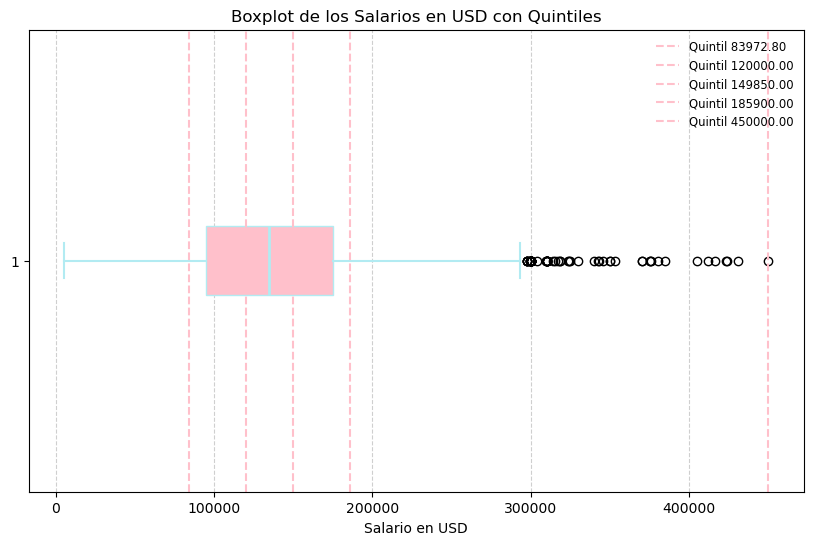

In [77]:
# Se explora gráficamente la información
import numpy as np
quintiles = np.percentile(df['salary_in_usd'], [20, 40, 60, 80, 100])
quintiles = [83972.8, 120000.0, 149850.0, 185900.0, 450000.0]
# Se crea el boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(df['salary_in_usd'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='#FFC0CB', color='#B2EBF2'),
            medianprops=dict(color='#B2EBF2', linewidth=2),
            whiskerprops=dict(color='#B2EBF2', linewidth=1.5),
            capprops=dict(color='#B2EBF2', linewidth=1.5))
# Se agrega líneas para los quintiles
for quintile in quintiles:
    plt.axvline(quintile, color='#FFC0CB', linestyle='--', linewidth=1.5, label=f'Quintil {quintile:.2f}')
# Se grafica el boxplot
plt.title('Boxplot de los Salarios en USD con Quintiles')
plt.xlabel('Salario en USD')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.legend(loc='upper right', fontsize='small', frameon=False)
plt.show()



<span style="color:#87CEEB; font-size:20px; font-weight:bold;">2.</span>
<span style="font-size:15px;">Una comparación entre los salarios agrupados por 3 diferentes categorías a tu elección. ¿Para cuál de ellas las medidas de tendencia central son más representativas? ¿Para cuál son menos representativas? Explica.</span>

/var/folders/1w/3hr0pjc57r388nvn5rx5dzyw0000gn/T/ipykernel_52101/797285777.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='experience_level', y='salary_in_usd', palette='pastel')


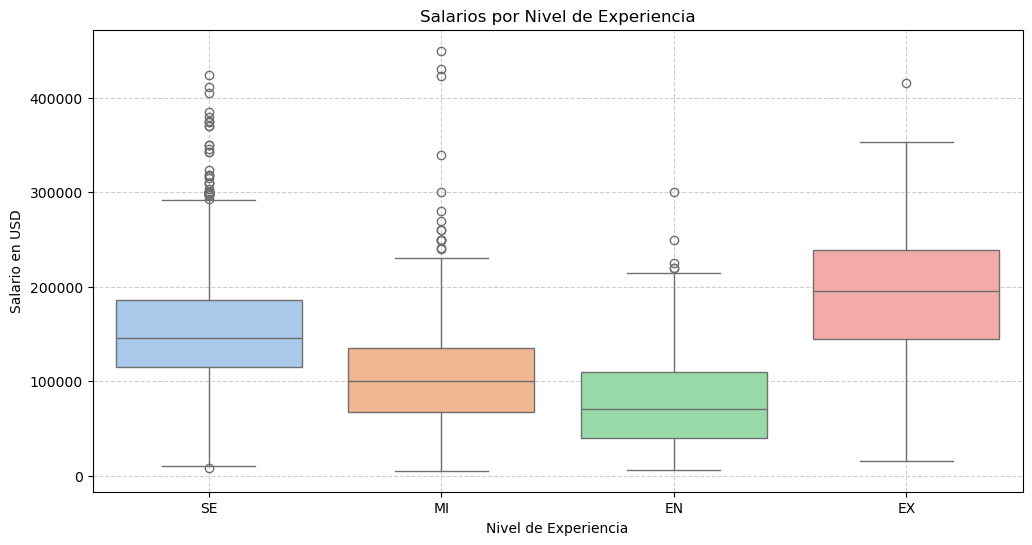

Estadísticas para cada nivel de experiencia:
                          media   mediana  desviacion_estandar  minimo  maximo
experience_level                                                              
EN                 78546.284375   70000.0         52225.424309    5409  300000
EX                194930.929825  196000.0         70661.929661   15000  416000
MI                104525.939130  100000.0         54387.685128    5132  450000
SE                153051.071542  146000.0         56896.263954    8000  423834
                   count           mean           std      min       25%  \
experience_level                                                           
EN                 320.0   78546.284375  52225.424309   5409.0   40000.0   
EX                 114.0  194930.929825  70661.929661  15000.0  145000.0   
MI                 805.0  104525.939130  54387.685128   5132.0   66837.0   
SE                2516.0  153051.071542  56896.263954   8000.0  115000.0   

                       5

In [78]:
# Comparación por nivel de experiencia
experience_level_stats = df.groupby('experience_level')['salary_in_usd'].describe()
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='experience_level', y='salary_in_usd', palette='pastel')
plt.title('Salarios por Nivel de Experiencia')
plt.xlabel('Nivel de Experiencia')
plt.ylabel('Salario en USD')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
# Se calcula medidas para la categoría 'experience_level'
experience_stats = df.groupby('experience_level')['salary_in_usd'].agg(
    media='mean',
    mediana='median',
    desviacion_estandar='std',
    minimo='min',
    maximo='max'
)
# Se muestran los resultados
print("Estadísticas para cada nivel de experiencia:")
print(experience_stats)
print(experience_level_stats)

<span style="font-size:15px;"><span style="font-size:15px;">
En los 4 grupos la desviación estándar supera los USD 52.000 con valores máximos y mínimos extremos que hacen que la mediana sea más representativa que la media en términos generales. Sin embargo, al comparar medias y medianas de cada categoría se puede constatar que son relativamente similares por lo que pareciera ser que ambas medidas de tendencia central son representativas debido a que los outliers no están determinando en gran medida a la media. Por tanto, se puede concluir que si bien la mediana pudiese ser la medida de tendencia central más representativa, la media también puede ser adecuada, toda vez que los outliers no la condicionan tanto.
Adicionalmente, se puede observar que la mayoría de los registros, esto es: 2.516 de 3.755, cerca de un 60% corresponde a nivel senior/experto [SE]. Por tanto, son los más representados en la data
</span>

/var/folders/1w/3hr0pjc57r388nvn5rx5dzyw0000gn/T/ipykernel_52101/341277974.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='company_size', y='salary_in_usd', palette='pastel')


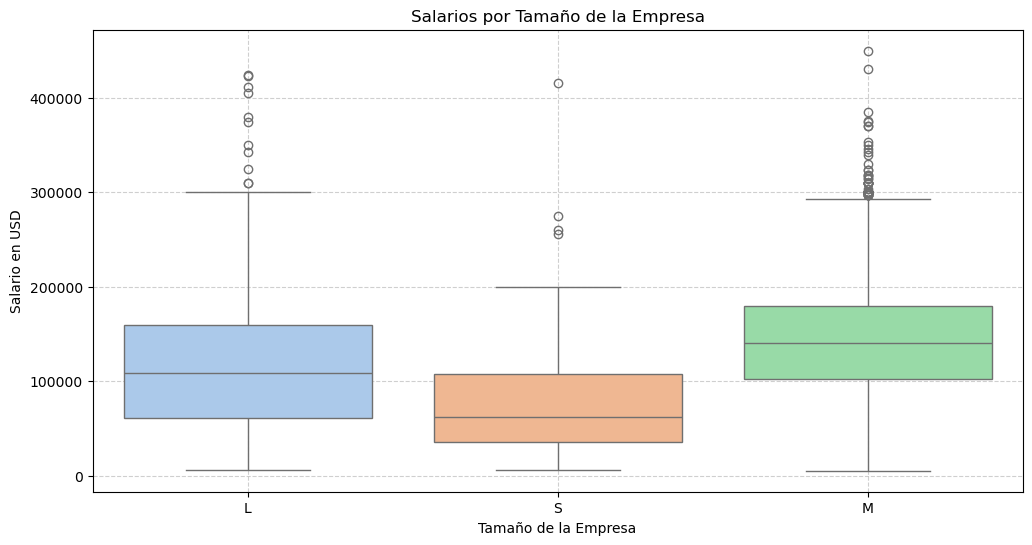


Estadísticas para cada tamaño de empresa:
               count           mean           std     min        25%  \
company_size                                                           
L              454.0  118300.982379  75832.391505  5409.0   60830.75   
M             3153.0  143130.548367  58992.813382  5132.0  102100.00   
S              148.0   78226.682432  61955.141792  5679.0   35668.00   

                   50%        75%       max  
company_size                                 
L             108500.0  159175.00  423834.0  
M             140000.0  180000.00  450000.0  
S              62146.0  107481.75  416000.0  
Estadísticas para tamaño de empresa:
                      media   mediana  desviacion_estandar  minimo  maximo
company_size                                                              
L             118300.982379  108500.0         75832.391505    5409  423834
M             143130.548367  140000.0         58992.813382    5132  450000
S              78226.682432  

In [79]:
# Comparación por tamaño de la empresa
company_size_stats = df.groupby('company_size')['salary_in_usd'].describe()
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='company_size', y='salary_in_usd', palette='pastel')
plt.title('Salarios por Tamaño de la Empresa')
plt.xlabel('Tamaño de la Empresa')
plt.ylabel('Salario en USD')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
print("\nEstadísticas para cada tamaño de empresa:")
print(company_size_stats)
# Cálculo de medidas para la categoría 'company_size'
company_sz_stats = df.groupby('company_size')['salary_in_usd'].agg(
    media='mean',
    mediana='median',
    desviacion_estandar='std',
    minimo='min',
    maximo='max'
)
# Mostrar los resultados
print("Estadísticas para tamaño de empresa:")
print(company_sz_stats)
print(company_size_stats)

<span style="font-size:15px;"><span style="font-size:15px;">
En los 3 tipos de empresa la desviación estándar supera los USD 58.000 con valores máximos y mínimos extremos que hacen que la mediana sea más representativa que la media en términos generales.
La mayoría de los registros, esto es: 3.153 de 3.755, cerca de un 84% corresponde a tamaño de empresa mediana [M]
</span>

/var/folders/1w/3hr0pjc57r388nvn5rx5dzyw0000gn/T/ipykernel_52101/1164054680.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='employment_type', y='salary_in_usd', palette='pastel')


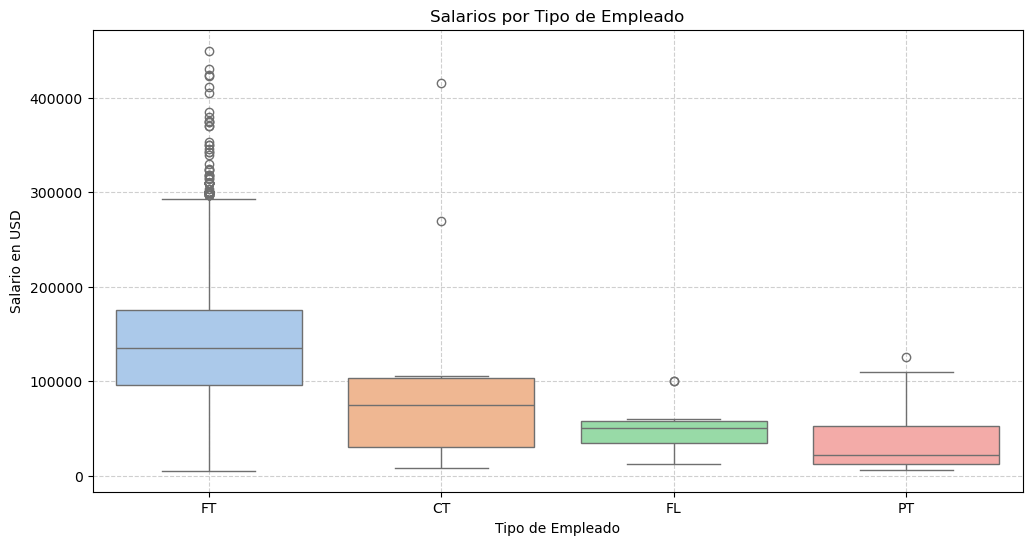


Estadísticas para cada tipo de empleado:
                  count           mean            std      min       25%  \
employment_type                                                            
CT                 10.0  113446.900000  130176.746842   7500.0  30117.25   
FL                 10.0   51807.800000   29458.879336  12000.0  34281.00   
FT               3718.0  138314.199570   62452.177613   5132.0  95599.00   
PT                 17.0   39533.705882   38312.145181   5409.0  12000.00   

                      50%       75%       max  
employment_type                                
CT                75000.0  103750.0  416000.0  
FL                50000.0   57500.0  100000.0  
FT               135000.0  175075.0  450000.0  
PT                21669.0   52533.0  125404.0  
Estadísticas para tipo de empleado:
                         media   mediana  desviacion_estandar  minimo  maximo
employment_type                                                              
CT               1134

In [80]:
# Comparación por tipo de empleado
employment_type_stats = df.groupby('employment_type')['salary_in_usd'].describe()
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='employment_type', y='salary_in_usd', palette='pastel')
plt.title('Salarios por Tipo de Empleado')
plt.xlabel('Tipo de Empleado')
plt.ylabel('Salario en USD')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
print("\nEstadísticas para cada tipo de empleado:")
print(employment_type_stats)
# Cálculo de medidas para la categoría 'employment_type'
employment_type_sz_stats = df.groupby('employment_type')['salary_in_usd'].agg(
    media='mean',
    mediana='median',
    desviacion_estandar='std',
    minimo='min',
    maximo='max'
)
# Mostrar los resultados
print("Estadísticas para tipo de empleado:")
print(employment_type_sz_stats)

<span style="font-size:15px;"><span style="font-size:15px;">
En 2 de los 4 grupos las medias y la medianas son similares en sus respectivas categorías [FL] trabajo freelance y [FT] tiempo completo, lo que permite inferir que la distribución de salarios en cada grupo es relativamente equilibrada. Por tanto en estos dos casos [FL] y [FT] se puede decir que tanto la media como la mediana son razonbablemene representativas toda vez que no se ven tan afectadas por los outliers. Sin embargo en las categorías [CT] y [PT] la mediana es más representativas, considerando la varianza y la influencia de los outliers.
La mayoría de los registros, esto es: 3.718 de 3.755, cerca de un 100% corresponde a [FT] tiempo completo
</span>

<span style="color:#87CEEB; font-size:20px; font-weight:bold;">3.</span>
<span style="font-size:15px;">¿Qué cargos reciben mejores sueldos en las empresas con sede en Estados Unidos?</span>

In [74]:
# Filtrar los datos solo para empresas en Estados Unidos
df_us = df[df['company_location'] == 'US']

# Agrupar por cargo y calcular el salario promedio en USD
salary_by_job_us = df_us.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)

# Mostrar los resultados
print(salary_by_job_us.head(10))  # Mostrar los 10 primeros cargos mejor remunerados


job_title
Data Analytics Lead                   405000.000000
Data Science Tech Lead                375000.000000
Director of Data Science              294375.000000
Principal Data Scientist              255500.000000
Cloud Data Architect                  250000.000000
Applied Data Scientist                238000.000000
Head of Data                          233183.333333
Machine Learning Software Engineer    217400.000000
Data Lead                             212500.000000
Head of Data Science                  202355.000000
Name: salary_in_usd, dtype: float64


<span style="font-size:15px;">
Los 3 cargos que reciben los mejores sueldos en las empresas con sede en Estados Unidos son:
- Data Analytics Lead
- Data Science Tech Lead
- Director of Data Science
</span>